In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris.data.shape

(150, 4)

In [4]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
print(knn.score(X_test, y_test))

1.0


In [10]:
import numpy as np

# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.975, 3: 0.9583333333333334, 4: 0.9583333333333334, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.975, 8: 0.975, 9: 0.975, 10: 0.975, 11: 0.975, 12: 0.9666666666666667} 
 {1: 0.9666666666666667, 2: 0.9333333333333333, 3: 1.0, 4: 1.0, 5: 1.0, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 1.0, 10: 1.0, 11: 0.9666666666666667, 12: 0.9666666666666667}


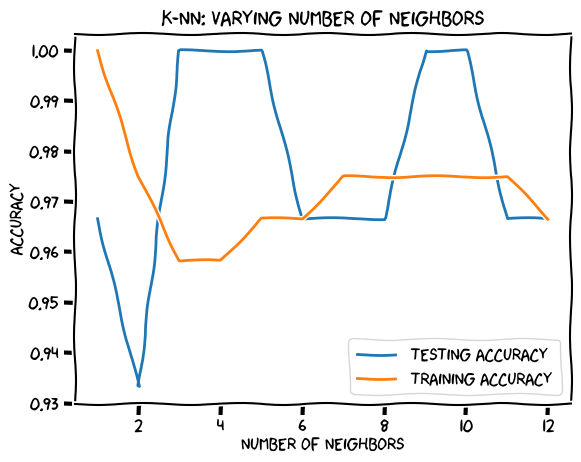

In [11]:
from matplotlib import pyplot as plt
plt.xkcd()

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

